<h1> Exercise 1: Perceptron Implementation

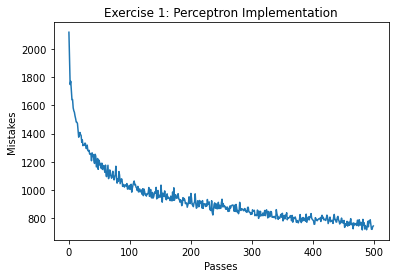

In [1]:
import numpy
import matplotlib.pyplot as plt
def plotGraph(data, xlabel, ylabel, title, filename, ymin=-1, ymax=-1):
	plt.plot(data)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	plt.title(title)
	if ymin != -1:
		plt.ylim(ymin=ymin)
	if ymax != -1:
		plt.ylim(ymax=ymax)
	plt.savefig(filename)
	plt.clf()


def perceptron(X, y, w, b, max_pass = 500):
    mistake = [0]*max_pass
    n = len(y)
    for t in range(0, max_pass):
        mistake[t] = 0
        for i in range(0, n):
            if (y[i] * (numpy.dot(X[i], w) + b) <= 0):
                w = numpy.add(w, numpy.multiply(y[i],X[i]))
                b += y[i]
                mistake[t]+=1
    return w, b, mistake

spambase_X = numpy.matrix.transpose(numpy.genfromtxt('spambase_X.csv', delimiter=','))
spambase_y = numpy.genfromtxt('spambase_y.csv', delimiter=',')
w = numpy.zeros(len(spambase_X[0]))
b = 0
w,b,mistakes = perceptron(spambase_X, spambase_y, w, b, 500)
plt.plot(mistakes)
plt.title('Exercise 1: Perceptron Implementation')
plt.xlabel('Passes')
plt.ylabel('Mistakes')
plt.savefig('a1q1_perceptron.png', facecolor='w', edgecolor='w')


<h1> Question 2

Training error for RR with lambda = 0 is 7.418708804723804
Training loss for RR with lambda = 0 is 7.416138458765631
Testing error for RR with lambda = 0 is 185.11147864906565
Training error for RR with lambda = 10 is 7.418708804723804
Training loss for RR with lambda = 10 is 7.418708804723804
Testing error for RR with lambda = 10 is 201.16839695495364
Training error for GD with lambda = 0 is 48.64112292362268
Training loss for GD with lambda = 0 is 48.64112292362268
Testing error for GD with lambda = 0 is 52.30678290155527
Training error for GD with lambda = 10 is 59.36674354271292
Training loss for GD with lambda = 10 is 59.36674354271292
Testing error for GD with lambda = 10 is 60.39069608136287


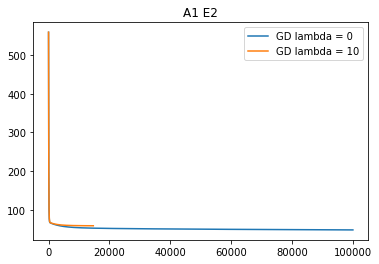

In [91]:
import numpy
import matplotlib.pyplot as plt

housing_X_test = numpy.matrix.transpose(numpy.genfromtxt('housing_X_test.csv', delimiter=','))
housing_X_train = numpy.matrix.transpose(numpy.genfromtxt('housing_X_train.csv', delimiter=','))

housing_y_test = numpy.genfromtxt('housing_y_test.csv', delimiter=',')
housing_y_train = numpy.genfromtxt('housing_y_train.csv', delimiter=',')

def ridgeRegression (X, y, l):
    n = len(y)
    d = 1
    if (isinstance(X[0], list)):
        d = len(X[0])
    one = numpy.ones(n)
    mins = (1/n)*(X.T.dot(y))
    mins = numpy.append(mins, (1/n)*(one.T.dot(y)))
    w1 = 2*l*numpy.identity(d) + (1/n)*(X.T @ X)
    w1extend = (1/n)*(X.T @ one)
    neww1 = numpy.c_[w1, w1extend]

    w2 = (1/n)*(one.T @ X)
    w2 = numpy.append(w2,1)
    #b1 = 1/n*X.T
    #b2 = 1/n*one.T
    
    A = numpy.vstack((neww1, w2))
    w = numpy.linalg.solve(A,mins)
    b = w[-1]
    w = w[:-1]
    return w, b

def gradientDescent (X, y, l, max_pass, step, tol):
    n = len(y)
    d = len(X[0])
    wt = [numpy.zeros(d)]
    bt = [0]
    ones = numpy.ones(n)
    for i in range(1, max_pass+1):
        wt.append(wt[-1] - step*((1/n)*((1/n)*(X.T @ (X @ wt[-1] + bt[-1] - y))) + 2 * wt[-1].dot(l)))
        bt.append(bt[-1] - step*((1/n)*((1/n)* (ones.T @ (X @ wt[-2] + bt[-1] - y)))))
        if(numpy.linalg.norm(wt[-1]-wt[-2]) <= tol):
            break

    return wt, bt

n = len(housing_X_test)

# RR lambda = 0
wRR0, bRR0 = ridgeRegression(housing_X_train, housing_y_train, 0)

trainerrorRR0 = numpy.sum(numpy.square(housing_X_train.dot(wRR0) + bRR0 - housing_y_train))/(2 * n)
print("Training error for RR with lambda = 0 is",trainerrorRR0)

trainlossRR0 = trainerrorRR0 + 0 * numpy.sum(numpy.square(wRR0))
print("Training loss for RR with lambda = 0 is", trainlossRR0)

testerrorRR0 = numpy.sum(numpy.square(housing_X_test.dot(wRR0) + bRR0 - housing_y_test))/(2 * n)
print("Testing error for RR with lambda = 0 is", testerrorRR0)

# RR lambda = 10
wRR10, bRR10 = ridgeRegression(housing_X_train, housing_y_train, 10)

trainerrorRR10 = numpy.sum(numpy.square(housing_X_train.dot(wRR10) + bRR10 - housing_y_train))/(2 * n)
print("Training error for RR with lambda = 10 is",trainerrorRR10)

trainlossRR10 = trainerrorRR10 + 0 * numpy.sum(numpy.square(wRR10))
print("Training loss for RR with lambda = 10 is", trainlossRR10)

testerrorRR10 = numpy.sum(numpy.square(housing_X_test.dot(wRR10) + bRR10 - housing_y_test))/(2 * n)
print("Testing error for RR with lambda = 10 is", testerrorRR10)

# GD lambda = 0
wGD0, bGD0 = gradientDescent(housing_X_train, housing_y_train, 0, 100000, 0.00001, 0.0000001)

trainerrorGD0 = numpy.sum(numpy.square(housing_X_train.dot(wGD0[-1]) + bGD0[-1] - housing_y_train))/(2 * n)
print("Training error for GD with lambda = 0 is", trainerrorGD0)

trainlossGD0 = trainerrorGD0 + 0 * numpy.sum(numpy.square(wGD0[-1]))
print("Training loss for GD with lambda = 0 is", trainlossGD0)

testerrorGD0 = numpy.sum(numpy.square(housing_X_test.dot(wGD0[-1]) + bGD0[-1] - housing_y_test))/(2 * n)
print("Testing error for GD with lambda = 0 is", testerrorGD0)


# RR lambda = 10
wGD10, bGD10 = gradientDescent(housing_X_train, housing_y_train, 10, 100000, 0.00001, 0.0000001)

trainerrorGD10 = numpy.sum(numpy.square(housing_X_train.dot(wGD10[-1]) + bGD10[-1] - housing_y_train))/(2 * n)
print("Training error for GD with lambda = 10 is", trainerrorGD10)

trainlossGD10 = trainerrorGD10 + 0 * numpy.sum(numpy.square(wGD10[-1]))
print("Training loss for GD with lambda = 10 is", trainlossGD10)

testerrorGD10 = numpy.sum(numpy.square(housing_X_test.dot(wGD10[-1]) + bGD10[-1] - housing_y_test))/(2 * n)
print("Testing error for GD with lambda = 10 is", testerrorGD10)

traininglossiterGD0 = []
traininglossiterGD10 = []
for i in range(1000000):
    if i < len(wGD0):
        traininglossiterGD0.append(numpy.sum(numpy.square(housing_X_train.dot(wGD0[i]) + bGD0[i] - housing_y_train))/(2 * n) + 0 * numpy.sum(numpy.square(wGD0[i])))

    if i < len(wGD10):
        traininglossiterGD10.append(numpy.sum(numpy.square(housing_X_train.dot(wGD10[i]) + bGD10[i] - housing_y_train))/(2 * n) + 0 * numpy.sum(numpy.square(wGD10[i])))

plt.title("A1 E2")
plt.plot(range(len(wGD0)), traininglossiterGD0, label = 'GD lambda = 0')
plt.plot(range(len(wGD10)), traininglossiterGD10, label = 'GD lambda = 10')
plt.legend(loc='upper right')
plt.savefig('a1q2e.png', facecolor='w', edgecolor='w')

<h1> Exercise 3: Playing with Regression

Average Mean Squared Error for Set A using Linear Regression is: 3.2474001735563336
Average Mean Squared Error for Set A using Ridge Regression 1 is: 3.1393937714571583
Average Mean Squared Error for Set A using Ridge Regression 10 is: 2.778034132092459
Average Mean Squared Error for Set A using Lasso 1 is: 3.020398627748416
Average Mean Squared Error for Set A using Lasso 10 is: 3.602632561104983
Best performer of set A is: Ridge Regression 10
Average Mean Squared Error for Set B using Linear Regression is: 2.7426823746517077
Average Mean Squared Error for Set B using Ridge Regression 1 is: 2.616205111992319
Average Mean Squared Error for Set B using Ridge Regression 10 is: 2.0597132198546957
Average Mean Squared Error for Set B using Lasso 1 is: 2.265165239893118
Average Mean Squared Error for Set B using Lasso 10 is: 1.8096725417753268
Best performer of set B is: Lasso 10
Average Mean Squared Error for Set C using Linear Regression is: 507.7516187628963
Average Mean Squared Error fo

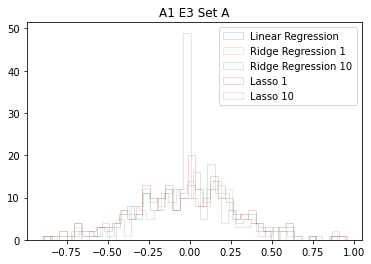

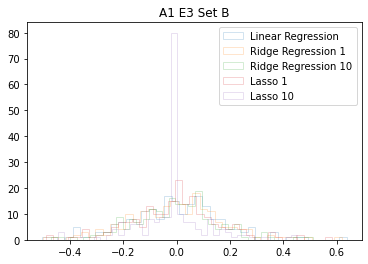

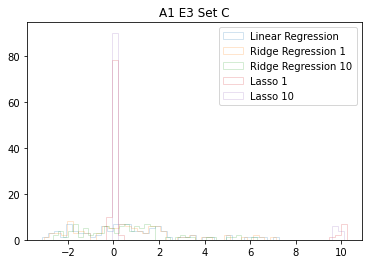

In [29]:
import numpy
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_test_A = numpy.genfromtxt('X_test_A.csv', delimiter=',')
X_test_B = numpy.genfromtxt('X_test_B.csv', delimiter=',')
X_test_C = numpy.genfromtxt('X_test_C.csv', delimiter=',')

X_train_A = numpy.genfromtxt('X_train_A.csv', delimiter=',')
X_train_B = numpy.genfromtxt('X_train_B.csv', delimiter=',')
X_train_C = numpy.genfromtxt('X_train_C.csv', delimiter=',')

Y_test_A = numpy.genfromtxt('Y_test_A.csv', delimiter=',')
Y_test_B = numpy.genfromtxt('Y_test_B.csv', delimiter=',')
Y_test_C = numpy.genfromtxt('Y_test_C.csv', delimiter=',')

Y_train_A = numpy.genfromtxt('Y_train_A.csv', delimiter=',')
Y_train_B = numpy.genfromtxt('Y_train_B.csv', delimiter=',')
Y_train_C = numpy.genfromtxt('Y_train_C.csv', delimiter=',')

def linReg(X, y, testX, testy):
    reg = LinearRegression().fit(X, y)
    pre = reg.predict(testX)
    return reg.coef_, mean_squared_error(pre, testy)

def ridge(X, y, testX, testy, reg):
    clf = Ridge(alpha = reg)
    clf.fit(X, y)
    pre = clf.predict(testX)
    return clf.coef_, mean_squared_error(testy, pre)

def lasso(X, y, testX, testy, reg):
    # since lasso optimization objective is (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
    # 
    n = len(y)
    clf = Lasso(alpha = reg/n)
    clf.fit(X, y)
    pre = clf.predict(testX)
    return clf.coef_, mean_squared_error(testy, pre)

def setA():
    wLinReg, resLinReg = linReg(X_train_A, Y_train_A, X_test_A, Y_test_A)
    print("Average Mean Squared Error for Set A using Linear Regression is:", resLinReg)
    wRidge1, resRidge1 = ridge(X_train_A, Y_train_A, X_test_A, Y_test_A, 1)
    print("Average Mean Squared Error for Set A using Ridge Regression 1 is:", resRidge1)
    wRidge10, resRidge10 = ridge(X_train_A, Y_train_A, X_test_A, Y_test_A, 10)
    print("Average Mean Squared Error for Set A using Ridge Regression 10 is:", resRidge10)
    wLasso1, resLasso1 = lasso(X_train_A, Y_train_A, X_test_A, Y_test_A, 1)
    print("Average Mean Squared Error for Set A using Lasso 1 is:", resLasso1)
    wLasso10, resLasso10 = lasso(X_train_A, Y_train_A, X_test_A, Y_test_A, 10)
    print("Average Mean Squared Error for Set A using Lasso 10 is:", resLasso10)
    best = min(resLinReg, resRidge1, resRidge10, resLasso1, resLasso10)
    print("Best performer of set A is: ", end='')
    if (best == resLinReg):
        print("Linear Regression")
    elif (best == resRidge1):
        print("Ridge Regression 1")
    elif (best == resRidge10):
        print("Ridge Regression 10")
    elif (best == resLasso1):
        print("Lasso 1")
    elif (best == resLasso10):
        print("Lasso 10")
    kwargs = dict(histtype='step', alpha = 0.2, bins=40)
    figA = plt.figure()
    plt.title("A1 E3 Set A")
    plt.hist(wLinReg, **kwargs, label = 'Linear Regression')
    plt.hist(wRidge1, **kwargs, label = 'Ridge Regression 1')
    plt.hist(wRidge10, **kwargs, label = 'Ridge Regression 10')
    plt.hist(wLasso1, **kwargs, label = 'Lasso 1')
    plt.hist(wLasso10, **kwargs, label = 'Lasso 10')
    plt.legend(loc='upper right')
    plt.title
    figA.savefig('a1q3A.png', facecolor='w', edgecolor='w')
    

def setB():
    wLinReg, resLinReg = linReg(X_train_B, Y_train_B, X_test_B, Y_test_B)
    print("Average Mean Squared Error for Set B using Linear Regression is:", resLinReg)
    wRidge1, resRidge1 = ridge(X_train_B, Y_train_B, X_test_B, Y_test_B, 1)
    print("Average Mean Squared Error for Set B using Ridge Regression 1 is:", resRidge1)
    wRidge10, resRidge10 = ridge(X_train_B, Y_train_B, X_test_B, Y_test_B, 10)
    print("Average Mean Squared Error for Set B using Ridge Regression 10 is:", resRidge10)
    wLasso1, resLasso1 = lasso(X_train_B, Y_train_B, X_test_B, Y_test_B, 1)
    print("Average Mean Squared Error for Set B using Lasso 1 is:", resLasso1)
    wLasso10, resLasso10 = lasso(X_train_B, Y_train_B, X_test_B, Y_test_B, 10)
    print("Average Mean Squared Error for Set B using Lasso 10 is:", resLasso10)
    best = min(resLinReg, resRidge1, resRidge10, resLasso1, resLasso10)
    print("Best performer of set B is: ", end='')
    if (best == resLinReg):
        print("Linear Regression")
    elif (best == resRidge1):
        print("Ridge Regression 1")
    elif (best == resRidge10):
        print("Ridge Regression 10")
    elif (best == resLasso1):
        print("Lasso 1")
    elif (best == resLasso10):
        print("Lasso 10")
    figB = plt.figure()
    plt.title("A1 E3 Set B")
    kwargs = dict(histtype='step', alpha = 0.2, bins=40)
    plt.hist(wLinReg, **kwargs, label = 'Linear Regression')
    plt.hist(wRidge1, **kwargs, label = 'Ridge Regression 1')
    plt.hist(wRidge10, **kwargs, label = 'Ridge Regression 10')
    plt.hist(wLasso1, **kwargs, label = 'Lasso 1')
    plt.hist(wLasso10, **kwargs, label = 'Lasso 10')
    plt.legend(loc='upper right')
    plt.title
    figB.savefig('a1q3B.png', facecolor='w', edgecolor='w')
    

def setC():
    wLinReg, resLinReg = linReg(X_train_C, Y_train_C, X_test_C, Y_test_C)
    print("Average Mean Squared Error for Set C using Linear Regression is:", resLinReg)
    wRidge1, resRidge1 = ridge(X_train_C, Y_train_C, X_test_C, Y_test_C, 1)
    print("Average Mean Squared Error for Set C using Ridge Regression 1 is:", resRidge1)
    wRidge10, resRidge10 = ridge(X_train_C, Y_train_C, X_test_C, Y_test_C, 10)
    print("Average Mean Squared Error for Set C using Ridge Regression 10 is:", resRidge10)
    wLasso1, resLasso1 = lasso(X_train_C, Y_train_C, X_test_C, Y_test_C, 1)
    print("Average Mean Squared Error for Set C using Lasso 1 is:", resLasso1)
    wLasso10, resLasso10 = lasso(X_train_C, Y_train_C, X_test_C, Y_test_C, 10)
    print("Average Mean Squared Error for Set C using Lasso 10 is:", resLasso10)
    best = min(resLinReg, resRidge1, resRidge10, resLasso1, resLasso10)
    print("Best performer of set C is: ", end='')
    if (best == resLinReg):
        print("Linear Regression")
    elif (best == resRidge1):
        print("Ridge Regression 1")
    elif (best == resRidge10):
        print("Ridge Regression 10")
    elif (best == resLasso1):
        print("Lasso 1")
    elif (best == resLasso10):
        print("Lasso 10")
    figC = plt.figure()
    plt.title("A1 E3 Set C")
    kwargs = dict(histtype='step', alpha = 0.2, bins=40)
    plt.hist(wLinReg, **kwargs, label = 'Linear Regression')
    plt.hist(wRidge1, **kwargs, label = 'Ridge Regression 1')
    plt.hist(wRidge10, **kwargs, label = 'Ridge Regression 10')
    plt.hist(wLasso1, **kwargs, label = 'Lasso 1')
    plt.hist(wLasso10, **kwargs, label = 'Lasso 10')
    plt.legend(loc='upper right')
    plt.title
    figC.savefig('a1q3C.png', facecolor='w', edgecolor='w')
    
setA()
setB()
setC()

<h1> Question 4

0.6658053958038772


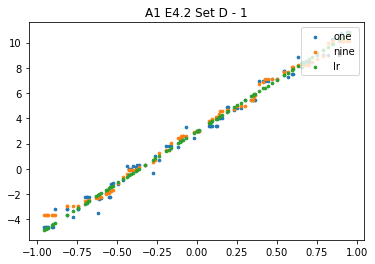

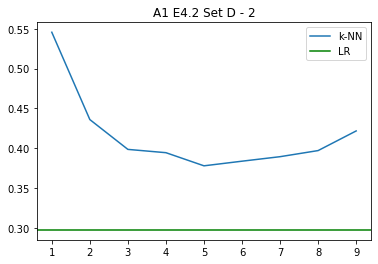

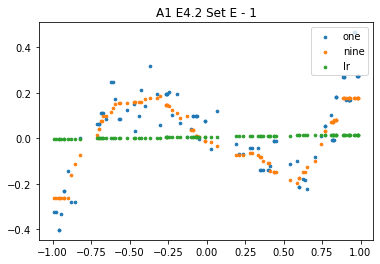

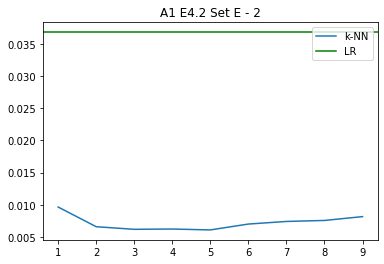

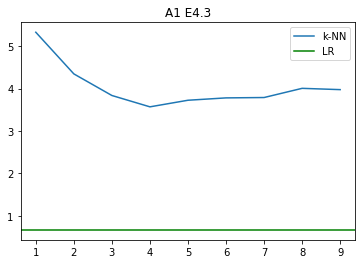

In [28]:
import numpy
import matplotlib.pyplot as plt

X_test_D = numpy.genfromtxt('X_test_D.csv', delimiter=',')
X_test_E = numpy.genfromtxt('X_test_E.csv', delimiter=',')
X_test_F = numpy.genfromtxt('X_test_F.csv', delimiter=',')

X_train_D = numpy.genfromtxt('X_train_D.csv', delimiter=',')
X_train_E = numpy.genfromtxt('X_train_E.csv', delimiter=',')
X_train_F = numpy.genfromtxt('X_train_F.csv', delimiter=',')

Y_test_D = numpy.genfromtxt('Y_test_D.csv', delimiter=',')
Y_test_E = numpy.genfromtxt('Y_test_E.csv', delimiter=',')
Y_test_F = numpy.genfromtxt('Y_test_F.csv', delimiter=',')

Y_train_D = numpy.genfromtxt('Y_train_D.csv', delimiter=',')
Y_train_E = numpy.genfromtxt('Y_train_E.csv', delimiter=',')
Y_train_F = numpy.genfromtxt('Y_train_F.csv', delimiter=',')

def partition(arr, l, r):
     
    x = arr[r]
    i = l
    for j in range(l, r):
         
        if arr[j] <= x:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
             
    arr[i], arr[r] = arr[r], arr[i]
    return i

def kthSmallest(arr, l, r, k):

    if (k > 0 and k <= r - l + 1):
        index = partition(arr, l, r)
        if (index - l == k - 1):
            return arr[index]
        if (index - l > k - 1):
            return kthSmallest(arr, l, index - 1, k)
        return kthSmallest(arr, index + 1, r,
                            k - index + l - 1)
    return INT_MAX

def knn(X, y, x, k):
    n = len(y)
    d = []
    for i in range(n):
        d.append(numpy.linalg.norm(x - X[i]))
    diff = d[:]
    kth = kthSmallest(diff, 0, n - 1, k)
    aggrigate = 0
    counter = 0
    for j in range(n):
        if (d[j] <= kth):
            aggrigate = aggrigate + y[j]
    return aggrigate / k

def ridgeRegression (X, y, l):
    n = len(y)
    d = 1
    if (isinstance(X[0], list)):
        d = len(X[0])
    one = numpy.ones(n)
    mins = (1/n)*(X.T.dot(y))
    mins = numpy.append(mins, (1/n)*(one.T.dot(y)))
    w1 = 2*l*numpy.identity(d) + (1/n)*(X.T @ X)
    w1extend = (1/n)*(X.T @ one)
    neww1 = numpy.c_[w1, w1extend]

    w2 = (1/n)*(one.T @ X)
    w2 = numpy.append(w2,1)
    #b1 = 1/n*X.T
    #b2 = 1/n*one.T
    
    A = numpy.vstack((neww1, w2))
    w = numpy.linalg.solve(A,mins)
    b = w[-1]
    w = w[:-1]
    return w, b
    
DEstimate = []
DEstimate.append([])
for t in X_test_D:
    DEstimate[0].append(knn(X_train_D, Y_train_D, t, 1))
DEstimate.append([])
for t in X_test_D:
    DEstimate[1].append(knn(X_train_D, Y_train_D, t, 2))
DEstimate.append([])
for t in X_test_D:
    DEstimate[2].append(knn(X_train_D, Y_train_D, t, 3))
DEstimate.append([])
for t in X_test_D:
    DEstimate[3].append(knn(X_train_D, Y_train_D, t, 4))
DEstimate.append([])
for t in X_test_D:
    DEstimate[4].append(knn(X_train_D, Y_train_D, t, 5))
DEstimate.append([])
for t in X_test_D:
    DEstimate[5].append(knn(X_train_D, Y_train_D, t, 6))
DEstimate.append([])
for t in X_test_D:
    DEstimate[6].append(knn(X_train_D, Y_train_D, t, 7))
DEstimate.append([])
for t in X_test_D:
    DEstimate[7].append(knn(X_train_D, Y_train_D, t, 8))
DEstimate.append([])
for t in X_test_D:
    DEstimate[8].append(knn(X_train_D, Y_train_D, t, 9))

wD, bD = ridgeRegression (X_train_D, Y_train_D, 0)
Dguess = numpy.multiply(X_test_D, wD) + bD
figD = plt.figure()
plt.title("A1 E4.2 Set D - 1")
plt.scatter(X_test_D, DEstimate[0], s=7, label='one')
plt.scatter(X_test_D, DEstimate[8], s=7, label='nine')
plt.scatter(X_test_D, Dguess, s=7, label='lr')
plt.legend(loc='upper right')
figD.savefig('a1q4bDPLOT1.png', facecolor='w', edgecolor='w')

Dmse = []
for i in range(0,9):
    Dmse.append(numpy.square(Y_test_D - DEstimate[i]).mean())

DLRerror = numpy.square(Y_test_D - Dguess).mean()


figMSED = plt.figure()
plt.title("A1 E4.2 Set D - 2")
plt.plot(range(1,10), Dmse, label = "k-NN")
plt.axhline(DLRerror, color = 'g', label = "LR")
plt.legend(loc='upper right')
figMSED.savefig('a1q4bDPLOT2.png', facecolor='w', edgecolor='w')

EEstimate = []
EEstimate.append([])
for t in X_test_E:
    EEstimate[0].append(knn(X_train_E, Y_train_E, t, 1))
EEstimate.append([])
for t in X_test_E:
    EEstimate[1].append(knn(X_train_E, Y_train_E, t, 2))
EEstimate.append([])
for t in X_test_E:
    EEstimate[2].append(knn(X_train_E, Y_train_E, t, 3))
EEstimate.append([])
for t in X_test_E:
    EEstimate[3].append(knn(X_train_E, Y_train_E, t, 4))
EEstimate.append([])
for t in X_test_E:
    EEstimate[4].append(knn(X_train_E, Y_train_E, t, 5))
EEstimate.append([])
for t in X_test_E:
    EEstimate[5].append(knn(X_train_E, Y_train_E, t, 6))
EEstimate.append([])
for t in X_test_E:
    EEstimate[6].append(knn(X_train_E, Y_train_E, t, 7))
EEstimate.append([])
for t in X_test_E:
    EEstimate[7].append(knn(X_train_E, Y_train_E, t, 8))
EEstimate.append([])
for t in X_test_E:
    EEstimate[8].append(knn(X_train_E, Y_train_E, t, 9))

wE, bE = ridgeRegression (X_train_E, Y_train_E, 0)
Eguess = numpy.multiply(X_test_E, wE) + bE
figE = plt.figure()
plt.title("A1 E4.2 Set E - 1")
plt.scatter(X_test_E, EEstimate[0], s=7, label='one')
plt.scatter(X_test_E, EEstimate[8], s=7, label='nine')
plt.scatter(X_test_E, Eguess, s=7, label='lr')
plt.legend(loc='upper right')
figE.savefig('a1q4bEPLOT1.png', facecolor='w', edgecolor='w')

Emse = []
for i in range(0,9):
    Emse.append(numpy.square(Y_test_E - EEstimate[i]).mean())

ELRerror = numpy.square(Y_test_E - Eguess).mean()


figMSEE = plt.figure()
plt.title("A1 E4.2 Set E - 2")
plt.plot(range(1,10), Emse, label = "k-NN")
plt.axhline(ELRerror, color = 'g', label = "LR")
plt.legend(loc='upper right')
figMSEE.savefig('a1q4bEPLOT2.png', facecolor='w', edgecolor='w')

FEstimate = []
FEstimate.append([])
for t in X_test_F:
    FEstimate[0].append(knn(X_train_F, Y_train_F, t, 1))
FEstimate.append([])
for t in X_test_F:
    FEstimate[1].append(knn(X_train_F, Y_train_F, t, 2))
FEstimate.append([])
for t in X_test_F:
    FEstimate[2].append(knn(X_train_F, Y_train_F, t, 3))
FEstimate.append([])
for t in X_test_F:
    FEstimate[3].append(knn(X_train_F, Y_train_F, t, 4))
FEstimate.append([])
for t in X_test_F:
    FEstimate[4].append(knn(X_train_F, Y_train_F, t, 5))
FEstimate.append([])
for t in X_test_F:
    FEstimate[5].append(knn(X_train_F, Y_train_F, t, 6))
FEstimate.append([])
for t in X_test_F:
    FEstimate[6].append(knn(X_train_F, Y_train_F, t, 7))
FEstimate.append([])
for t in X_test_F:
    FEstimate[7].append(knn(X_train_F, Y_train_F, t, 8))
FEstimate.append([])
for t in X_test_F:
    FEstimate[8].append(knn(X_train_F, Y_train_F, t, 9))

Fmse = []
for i in range(0,9):
    Fmse.append(numpy.square(Y_test_F - FEstimate[i]).mean())

wF, bF = ridgeRegression (X_train_F, Y_train_F, 0)
FGuess = numpy.multiply(X_test_F, wF) + bF

wF, bF = ridgeRegression (X_train_F, Y_train_F, 0)

FLRerror = 0
for ytest in Y_test_F:
    FLRerror = numpy.square(ytest - FGuess).mean()

figF = plt.figure()
plt.title("A1 E4.3")
plt.plot(range(1,10), Fmse, label = 'k-NN')
plt.axhline(FLRerror, color = 'g', label = "LR")
plt.legend(loc='upper right')
figF.savefig('a1q4c.png', facecolor='w', edgecolor='w')